In [3]:
!pip install opencv-python pytesseract
!apt-get install -y tesseract-ocr libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
The following additional packages will be installed:
  libarchive-dev libleptonica-dev
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 3,743 kB of archives.
After this operation, 16.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.4 [581 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Fetched 3,743 kB in 0s (12.0 MB/s)
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126319 files and directories currently i

In [46]:
from google.colab import files
uploaded = files.upload()

Saving plat6.jpeg to plat6.jpeg


In [47]:
import cv2
import pytesseract
import numpy as np
from google.colab.patches import cv2_imshow

In [48]:
# Fungsi preprocessing
def preprocess_image(img):
    img = cv2.resize(img, (640, 480))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    edged = cv2.Canny(blur, 100, 200)
    return img, edged

In [49]:
# Fungsi deteksi area plat
def find_plate_area(original_img, edged_img):
    contours, _ = cv2.findContours(edged_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    plate_img = None
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.018 * cv2.arcLength(cnt, True), True)
        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(cnt)
            plate_img = original_img[y:y+h, x:x+w]
            cv2.rectangle(original_img, (x,y), (x+w, y+h), (0,255,0), 2)
            break
    return original_img, plate_img

In [50]:
# Fungsi OCR
def ocr_plate(plate_img):
    if plate_img is None:
        return "Plat tidak ditemukan"
    plate_gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(plate_gray, config='--psm 8')
    return text.strip()

In [51]:
# Fungsi utama
def main(img_path):
    img = cv2.imread(img_path)
    img, edged = preprocess_image(img)
    img_with_box, plate_img = find_plate_area(img, edged)
    text = ocr_plate(plate_img)

    print("Hasil OCR:", text)
    cv2.putText(img_with_box, text, (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    cv2_imshow(img_with_box)

Hasil OCR: B 505 WLG


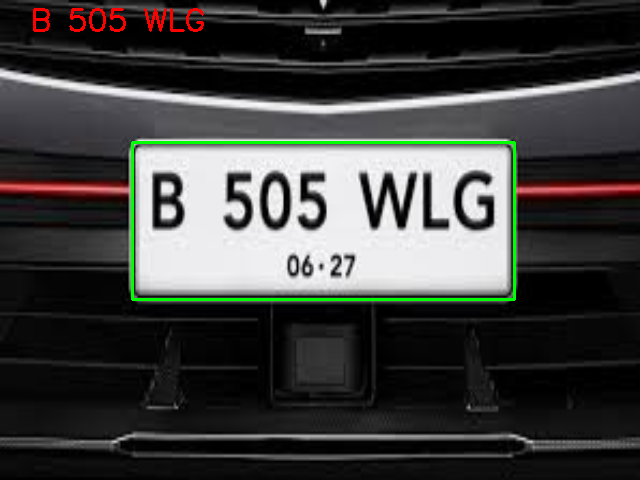

In [52]:
main("plat6.jpeg")